# Pure Bending of a Curved Bar

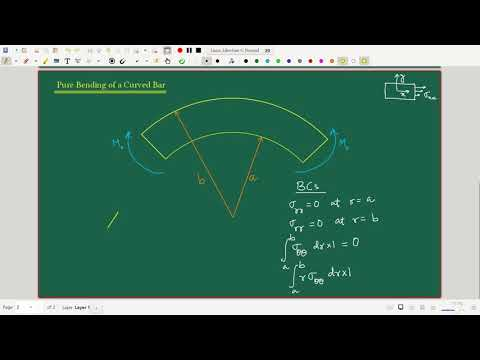

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('tp71tZOeitk')

In this file, we are going to consider the problem of the pure bending of a curved bar. And, again we are going to consider a $\theta$-independent Airy stress function. 

We begin by importing the `polarUtilities`

In [2]:
from polarUtilities import *

We now set the Airy stress function to be $\theta$-independent:

In [3]:
phi = sym.Function('phi')(r)
phi

phi(r)

We now solve the biharmonic equation $\nabla^4 \phi = 0$ as follows:

In [4]:
sym.dsolve(polarbiharmonic(phi))

Eq(phi(r), C1 + C2*r**2 + C3*r**2*log(r) + C4*log(r))

This solution is, of course, the same solution that we had obtained in the first file. However, in order to have the same notation as in Timoshenko and Goodier, we rewrite $\phi$ as follows:

In [5]:
A, B, C, D = sym.symbols('A, B, C, D')

phi = A*sym.log(r)+B*r**2*sym.log(r)+C*r**2+D
phi

A*log(r) + B*r**2*log(r) + C*r**2 + D

We again use a better way to display the variables as follows:

In [6]:
from IPython.display import Math, Latex

In [7]:
display(Math(r'\phi = {}'.format(sym.latex(phi))))

<IPython.core.display.Math object>

We can now obtain the expressions of the stress components $\sigma_{rr}$, $\sigma_{\theta\theta}$, and $\sigma_{r\theta}$:

In [8]:
sigmarr = sigma_rr(phi)
sigmatt = sigma_tt(phi)
sigmart = sigma_rt(phi)

display(Math(r'\sigma_{{rr}} = {}'.format(sym.latex(sigmarr))))
display(Math(r'\sigma_{{\theta\theta}} = {}'.format(sym.latex(sigmatt))))
display(Math(r'\sigma_{{r\theta}} = {}'.format(sym.latex(sigmart))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We note that up to this point there is no difference with the first file. However, we need to solve for $A$, $B$, $C$, and $D$ subject to the boundary conditions appropriate for this problem, which are:

\begin{align}
\sigma_{rr} &= 0 \quad \text{at $r=a$} \\
\sigma_{rr} &= 0 \quad \text{at $r=b$} \\
\int_a^b \sigma_{\theta\theta} \; {\rm d}r &= 0 \\
\int_a^b r \sigma_{\theta\theta} \; {\rm d}r &= -M_0
\end{align}
where $M_0$ is the externally applied moment. 

We now set up these boundary conditions as follows:

In [9]:
a, b = sym.symbols('a, b', positive=True)
M0 = sym.symbols('M_0')

lhs1 = sigmarr.subs(r,a)
rhs1 = 0
eq1 = sym.Eq(lhs1,rhs1)
display(eq1)

lhs2 = sigmarr.subs(r,b)
rhs2 = 0
eq2 = sym.Eq(lhs2, rhs2)
display(eq2)

lhs3 = sym.integrate(sigmatt,(r,a,b))
rhs3 = 0
eq3 = sym.Eq(lhs3,rhs3)
display(eq3)

lhs4 = sym.integrate(r*sigmatt,(r,a,b))
rhs4 = -M0
eq4 = sym.Eq(lhs4,rhs4)
display(eq4)

Eq(A/a**2 + 2*B*log(a) + B + 2*C, 0)

Eq(A/b**2 + 2*B*log(b) + B + 2*C, 0)

Eq(A/b - A/a - 2*B*a*log(a) + 2*B*b*log(b) - a*(B + 2*C) + b*(B + 2*C), 0)

Eq(A*log(a) - A*log(b) - B*a**2*log(a) + B*b**2*log(b) - a**2*(B + C) + b**2*(B + C), -M_0)

Next, we solve for $A$, $B$, and $C$. Note that while we have only three unknowns ($D$ does not appear), we have four equations. Strictly, speaking, we should be using only three of these equations to solve for the three unknowns (one of the equations is not independent). However, operationally speaking, we don't need to worry. A naive implementation using `linsolve` using all four equations still gives us the correct solution; thus:

In [10]:
soln, = sym.linsolve([eq1,eq2,eq3,eq4],(A,B,C))

Asoln = soln[0]
Bsoln = soln[1]
Csoln = soln[2]

display(Math(r'A = {}'.format(sym.latex(Asoln))))
display(Math(r'B = {}'.format(sym.latex(Bsoln))))
display(Math(r'C = {}'.format(sym.latex(Csoln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now that we have the values of $A$, $B$, and $C$, we can make the appropriate substitutions to find the solutions to the stress components as follows:

In [11]:
sigmarr_soln = sigmarr.subs([(A,Asoln),(B,Bsoln),(C,Csoln)]).simplify()
sigmatt_soln = sigmatt.subs([(A,Asoln),(B,Bsoln),(C,Csoln)]).simplify()

display(Math(r'\sigma_{{rr}}^{{\rm soln}} = {}'.format(sym.latex(sigmarr_soln))))
display(Math(r'\sigma_{{\theta\theta}}^{{\rm soln}} = {}'.format(sym.latex(sigmatt_soln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Note even though these solutions look quite different from those given in Timoshenko and Goodier, they are exactly the same. They may be easily simplified through elementary algebraic identities. 

Next, we will find out the displacements corresponding to the stress fields. For this, we will first find out the strains using the generalized Hooke's law (linear, elastic, isotropic material behaviour), and then find the displacements using the strain-displacement relations. 

For the application of the Hooke's law, we use the `sigmarr` and `sigmatt` variables instead of the `sigmarr_soln` and `sigmatt_soln` variables because the expressions of the former pair of variables contain $A$, $B$, and $C$ without their actual values substituted. Thus, we have:

In [12]:
E, nu = sym.symbols('E, nu')

ep_rr_stress = 1/E*(sigmarr - nu*sigmatt)
ep_tt_stress = 1/E*(sigmatt - nu*sigmarr)
ep_rt_stress = (1+nu)/E*sigmart

In [13]:
display(Math(r'\varepsilon_{{r\theta}} = {}'.format(sym.latex(ep_rr_stress))))
display(Math(r'\varepsilon_{{\theta\theta}} = {}'.format(sym.latex(ep_tt_stress))))
display(Math(r'\varepsilon_{{r\theta}} = {}'.format(sym.latex(ep_rt_stress))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The strain-displacement relations in polar coordinates are:

\begin{align*}
\varepsilon_{rr} &= \frac{\partial u}{\partial r}, \\
\varepsilon_{\theta\theta} &= \frac{1}{r} \frac{\partial v}{\partial \theta} + \frac{u}{r}, \\
\varepsilon_{r\theta} &= \frac{1}{2} \left( \frac{\partial v}{\partial r} - \frac{v}{r} + \frac{1}{r}\frac{\partial u}{\partial \theta} \right),
\end{align*}
where $u(r, \theta)$ and $v(r,\theta)$ are the displacement field variables along the radial and the azimuthal directions, respectively. Note that each of them is a function of both $r$ and $\theta$.

We first consider the first of the strain-displacement relations involving $\varepsilon_{rr}$, to determine the form of $u(r,\theta)$:

In [14]:
u = sym.Function('u')(r,theta)
lhs = sym.diff(u,r)
rhs = ep_rr_stress
eq1 = sym.Eq(lhs,rhs)
f1 = sym.Function('f_1')
sol = sym.pdsolve(eq1,solvefun=f1)
sol

Eq(u(r, theta), (-A*nu - A - 2*B*r**2*(nu - 1)*log(r) + E*r*f_1(-theta) + r**2*(-B*nu - B - 2*C*nu + 2*C))/(E*r))

We rewrite the expression on the right hand side of this solution in a slightly more convenient form and assign it to the variable `u_interim`:

In [15]:
u_interim = sol.rhs.expand().collect(A).collect(B).collect(C)
u_interim 

A*(-nu/(E*r) - 1/(E*r)) + B*(-2*nu*r*log(r)/E - nu*r/E + 2*r*log(r)/E - r/E) + C*(-2*nu*r/E + 2*r/E) + f_1(-theta)

We next consider the second of the strain-displacement relations involving $\varepsilon_{\theta\theta}$ to determine the form of $v(r,\theta)$. Note that we make use of the just-determined form of $u(r,\theta)$ (stored in the variable `u_interim`) to determine $v(r,theta)$. We store the solution in the variable `v_interim`:

In [16]:
v = sym.Function('v')(r,theta)
lhs = sym.diff(v,theta)
rhs = r*ep_tt_stress - u_interim
f2 = sym.Function('f_2')
eq2 = sym.Eq(lhs,rhs)
sol = sym.pdsolve(eq2,solvefun=f2)
v_interim = sol.rhs
v_interim

4*B*r*theta/E + f_2(r) - Integral(f_1(-xi), (xi, theta))

Finally, we substitute the forms of $u(r,\theta)$ and $v(r,\theta)$ (stored, respectively, in `u_interim` and `v_interim`) in the final strain-displacement relation involving $\varepsilon_{r\theta}$ to obtain an equation involving both the unknown functions $f_1(\theta)$ and $f_2(r)$:

In [17]:
lhs = (sym.diff(v_interim,r) - v_interim/r + 1/r*sym.diff(u_interim,theta))
rhs = 0
eq = sym.Eq(lhs,rhs)
eq

Eq(4*B*theta/E + Derivative(f_2(r), r) - (4*B*r*theta/E + f_2(r) - Integral(f_1(-xi), (xi, theta)))/r - Subs(Derivative(f_1(_xi_1), _xi_1), _xi_1, -theta)/r, 0)

This equation can be easily simplified:

In [18]:
eq.simplify()

Eq((r*Derivative(f_2(r), r) - f_2(r) + Integral(f_1(-xi), (xi, theta)) - Subs(Derivative(f_1(_xi_1), _xi_1), _xi_1, -theta))/r, 0)

From this equation we extract the following two equations:

\begin{align*}
r\frac{d {\rm f}_2(r)}{d r} - {\rm f}_2(r) &= C_0, \\
\int {\rm f}_1(-\theta) \; d \theta + \frac{d {\rm f}_1(-\theta)}{d \theta} &= -C_0, 
\end{align*}
where $C_0$ is some constant. The presence of this constant makes the equations slightly different from those present in Timoshenko and Goodier. 

Note that in order to arrive at the form of the second equation from the previous cell, we have replaced $\xi$ with $\theta$ and $\xi_1$ with $-\theta$.

Consider the first equation. We replace ${\rm f}_2(r)$ by ${\rm f}_{\rm r}(r)$ so that this first equation becomes:

In [19]:
C0 = sym.symbols('C_0')
fr = sym.Function('f_r')(r)
lhs = r*sym.diff(fr,r) - fr
rhs = C0
eq = sym.Eq(lhs,rhs)
eq

Eq(r*Derivative(f_r(r), r) - f_r(r), C_0)

 The solution to this equation is given by: 

In [20]:
sol = sym.dsolve(eq)
sol

Eq(f_r(r), C1*r - C_0)

We use $F$ instead of $C_1$; thus:

In [21]:
F = sym.symbols('F')
fr = -C0 + F*r
fr

-C_0 + F*r

Next, we consider the second equation. We replace ${\rm f}_1(-\theta)$ by ${\rm f}_\theta(\theta)$. This is an integro-differential equation and in order to solve it, we first differentiate it with respect to $\theta$ to obtain the following form:

\begin{gather*}
{\rm f}_\theta + \frac{d^2 {\rm f}_\theta}{d \theta^2} = 0
\end{gather*}

Note that as a result of this differentiation, the constant $C_0$ vanishes from this second equation. We set up this equation as follows:

In [22]:
ft = sym.Function(r'f_\theta')(theta)
lhs = ft + sym.diff(ft,theta,2)
rhs = 0
eq = sym.Eq(lhs,rhs)
eq

Eq(f_\theta(theta) + Derivative(f_\theta(theta), (theta, 2)), 0)

The solution to this equation is given by:

In [23]:
sol = sym.dsolve(eq)
sol

Eq(f_\theta(theta), C1*sin(theta) + C2*cos(theta))

Again, we use $H$ and $K$ instead of $C_1$ and $C_2$, respectively to maintain the same notation as in Timoshenko and Gooider; thus:

In [24]:
H, K = sym.symbols('H, K')
ft = H*sym.sin(theta) + K*sym.cos(theta)
ft

H*sin(theta) + K*cos(theta)

The expression of $u(r,\theta)$ then becomes:

In [25]:
u_semi = u_interim.subs(f1(-theta),ft)
u_semi

A*(-nu/(E*r) - 1/(E*r)) + B*(-2*nu*r*log(r)/E - nu*r/E + 2*r*log(r)/E - r/E) + C*(-2*nu*r/E + 2*r/E) + H*sin(theta) + K*cos(theta)

And, the expression of $v(r,\theta)$ becomes:

In [26]:
v_semi = 4*B*r*theta/E + fr - sym.integrate(ft,theta)
v_semi

4*B*r*theta/E - C_0 + F*r + H*cos(theta) - K*sin(theta)

Note that the solution form for $v(r,\theta)$ given by `v_semi` is different from the one presented by Timoshenko and Goodier because of the presence of the $C_0$ term. This constant represents a rigid body translation term and if we neglect it then we can proceed exactly like Timoshenko and Goodier to determine the values of the rest of the constants, ie. the values of $F$, $H$, and $K$ by using the following displacement boundary conditions:

\begin{align*}
u &= 0 \quad \text{at $r=r_0$}, \\ 
v &= 0 \quad \text{at $r=r_0$}, \\
\frac{\partial v}{\partial r} &= 0 \quad \text{at $r=r_0$ and $\theta=0$},
\end{align*}
where $\displaystyle r_0 = \frac{a+b}{2}$.

In [27]:
r0 = sym.symbols('r_0')

lhs = u_semi.subs([(theta,0),(r,r0)])
rhs = 0
eq1 = sym.Eq(lhs,rhs)

lhs = v_semi.subs([(C0,0),(theta,0),(r,r0)])
rhs = 0
eq2 = sym.Eq(lhs,rhs)


lhs = sym.diff(v_semi,r).subs([(theta,0),(r,r0)])
rhs = 0
eq3 = sym.Eq(lhs,rhs)

display(eq1,eq2,eq3)

Eq(A*(-nu/(E*r_0) - 1/(E*r_0)) + B*(-2*nu*r_0*log(r_0)/E - nu*r_0/E + 2*r_0*log(r_0)/E - r_0/E) + C*(-2*nu*r_0/E + 2*r_0/E) + K, 0)

Eq(F*r_0 + H, 0)

Eq(F, 0)

In [28]:
soln, = sym.linsolve([eq1,eq2,eq3],(F,H,K))

Fsoln = soln[0]
Hsoln = soln[1]
Ksoln = soln[2]
display(Fsoln,Hsoln,Ksoln)

0

0

(A*nu + A + 2*B*nu*r_0**2*log(r_0) + B*nu*r_0**2 - 2*B*r_0**2*log(r_0) + B*r_0**2 + 2*C*nu*r_0**2 - 2*C*r_0**2)/(E*r_0)

In the above solution, $\displaystyle r_0 = \frac{a+b}{2}$. Since the solutions of $A$, $B$, and $C$ were found earlier, `Fsoln`, `Hsoln`, and `Ksoln` are actually expressed in terms of known values. 